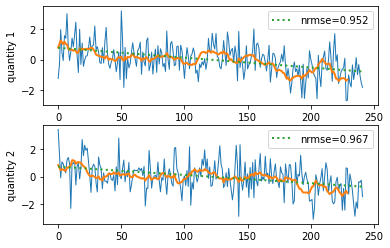

In [1]:
from source import *

from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import requests


url = "https://raw.githubusercontent.com/JuliaDynamics/NonlinearDynamicsTextbook/master/exercise_data/11.csv"
w = 12

response = requests.get(url)

temp = Path("temp")
temp.write_bytes(response.content)
timeseries = np.genfromtxt("temp")
temp.unlink()

moving_averaged = []

for x in timeseries.T:
    m = stepwise_moving_averaged(x, w)
    moving_averaged.append(m)

trends = []
nrmses = []

for y in timeseries.T:
    trend, mx, my = trend_function(y)
    trends.append(trend)
    
    nrmse = nrmse_function(y, trend, my)
    nrmses.append(nrmse)

fig, axes = plt.subplots(nrows=2)
for i, x in enumerate(timeseries.T):
    t = np.arange(x.size)
    axes[i].plot(t, x, linewidth=1)
    axes[i].plot(t[:-w], moving_averaged[i], linewidth=2)
    axes[i].plot(
        t, trends[i], linewidth=2, linestyle=":", label=f"nrmse={nrmses[i]:.3f}"
    )
    axes[i].set_ylabel(f"quantity {i + 1}")
    axes[i].legend()
plt.show()